# Shakespeare Sonnets Trajectory Tortuosity Analysis
## Using EEBO-BERT Embeddings (1595-1700)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load Results

In [2]:
# Load the analysis results
df = pd.read_csv('../results/shakespeare_sonnets_tortuosity.csv')
print(f"Analyzed {len(df)} sonnets")
df.head()

Analyzed 154 sonnets


,sonnet,overall_tortuosity,mean_line_tortuosity,max_line_tortuosity,couplet_tortuosity,words_found,words_missing
0,1,49.954371,2.613931,4.634438,7.891659,97,8
1,2,53.297341,2.968999,4.876821,8.753877,105,10
2,3,62.204433,3.383050,5.458862,8.506986,111,4
3,4,43.394583,2.959346,5.079899,6.725516,98,3
4,5,49.218786,2.898855,4.005148,8.563040,99,5


## Overall Statistics

In [3]:
print("OVERALL STATISTICS")
print("="*50)
print(f"Mean tortuosity: {df['overall_tortuosity'].mean():.2f}")
print(f"Median tortuosity: {df['overall_tortuosity'].median():.2f}")
print(f"Std dev: {df['overall_tortuosity'].std():.2f}")
print(f"Min: {df['overall_tortuosity'].min():.2f} (Sonnet {df.loc[df['overall_tortuosity'].idxmin(), 'sonnet']})")
print(f"Max: {df['overall_tortuosity'].max():.2f} (Sonnet {df.loc[df['overall_tortuosity'].idxmax(), 'sonnet']})")
print(f"\nWord coverage: {df['words_found'].sum()/(df['words_found'].sum()+df['words_missing'].sum())*100:.1f}%")

OVERALL STATISTICS
Mean tortuosity: 59.52
Median tortuosity: 57.72
Std dev: 11.45
Min: 35.24 (Sonnet 66)
Max: 115.50 (Sonnet 92)

Word coverage: 95.9%


## Distribution Plot

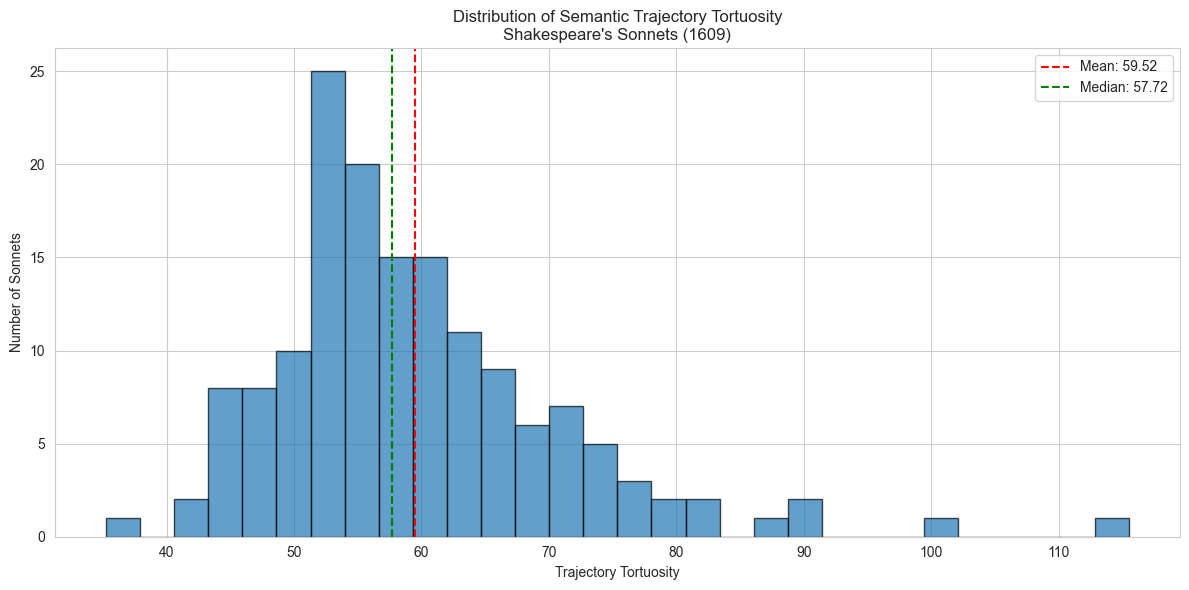

In [4]:
plt.figure(figsize=(12, 6))
plt.hist(df['overall_tortuosity'], bins=30, edgecolor='black', alpha=0.7)
plt.axvline(df['overall_tortuosity'].mean(), color='red', linestyle='--', label=f'Mean: {df["overall_tortuosity"].mean():.2f}')
plt.axvline(df['overall_tortuosity'].median(), color='green', linestyle='--', label=f'Median: {df["overall_tortuosity"].median():.2f}')
plt.xlabel('Trajectory Tortuosity')
plt.ylabel('Number of Sonnets')
plt.title('Distribution of Semantic Trajectory Tortuosity\nShakespeare\'s Sonnets (1609)')
plt.legend()
plt.tight_layout()
plt.show()

## Tortuosity Across the Sequence

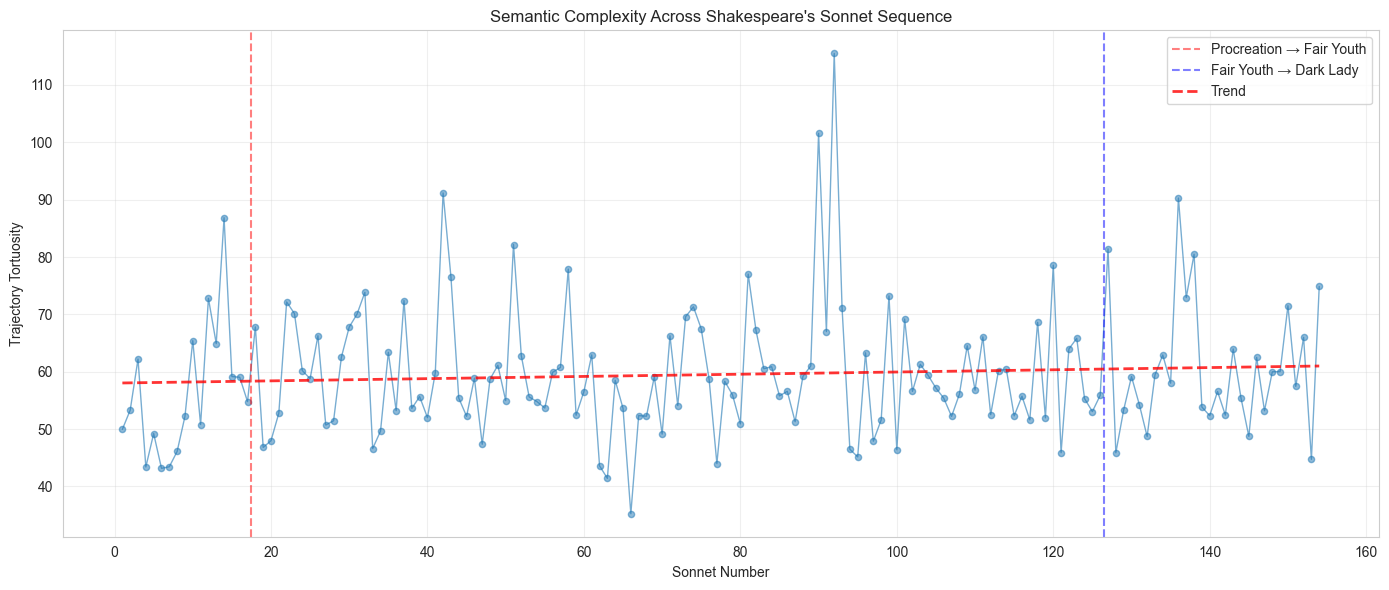

In [5]:
plt.figure(figsize=(14, 6))
plt.plot(df['sonnet'], df['overall_tortuosity'], alpha=0.6, linewidth=1)
plt.scatter(df['sonnet'], df['overall_tortuosity'], alpha=0.5, s=20)

# Add sequence boundaries
plt.axvline(17.5, color='red', linestyle='--', alpha=0.5, label='Procreation → Fair Youth')
plt.axvline(126.5, color='blue', linestyle='--', alpha=0.5, label='Fair Youth → Dark Lady')

# Add trend line
z = np.polyfit(df['sonnet'], df['overall_tortuosity'], 1)
p = np.poly1d(z)
plt.plot(df['sonnet'], p(df['sonnet']), "r--", alpha=0.8, linewidth=2, label=f'Trend')

plt.xlabel('Sonnet Number')
plt.ylabel('Trajectory Tortuosity')
plt.title('Semantic Complexity Across Shakespeare\'s Sonnet Sequence')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Comparison by Thematic Sequence

/var/folders/sn/81w3vkbd57l5ctt6y2z8x2jh0000gn/T/ipykernel_55863/1552246039.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(sequences.values(), labels=sequences.keys())


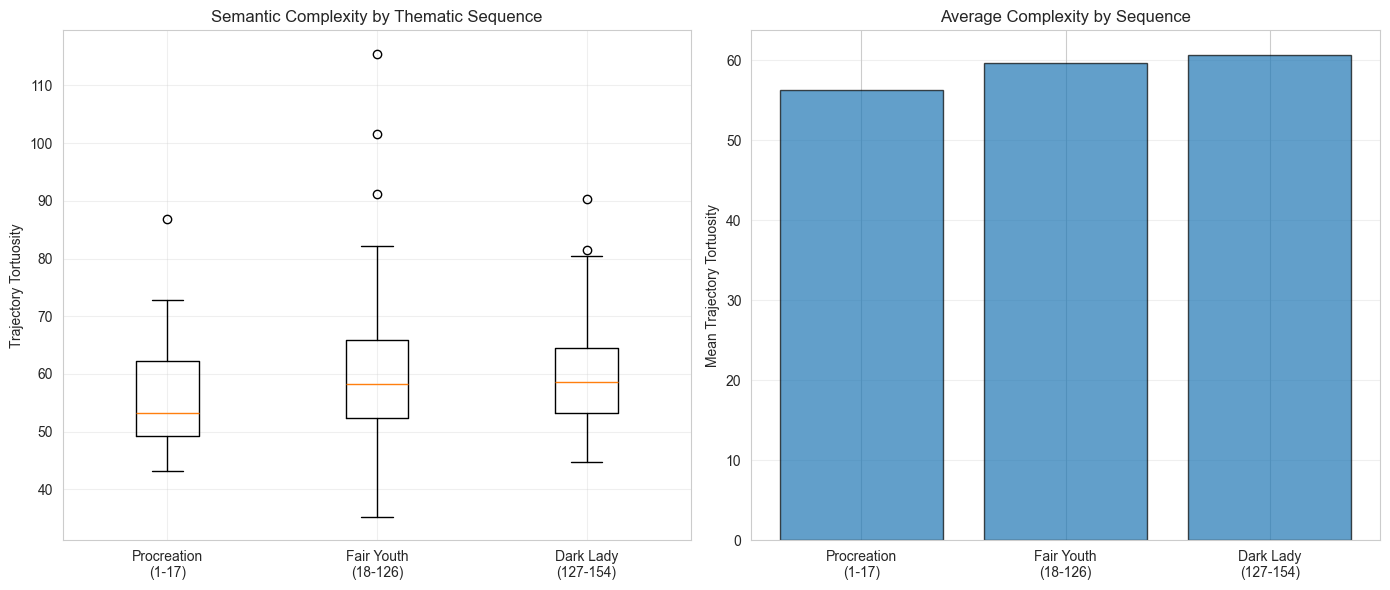


Sequence Statistics:
Procreation (1-17): Mean=56.28, Median=53.30
Fair Youth (18-126): Mean=59.71, Median=58.34
Dark Lady (127-154): Mean=60.73, Median=58.58


In [6]:
# Define sequences
procreation = df[df['sonnet'] <= 17]
fair_youth = df[(df['sonnet'] >= 18) & (df['sonnet'] <= 126)]
dark_lady = df[df['sonnet'] >= 127]

sequences = {
    'Procreation\n(1-17)': procreation['overall_tortuosity'],
    'Fair Youth\n(18-126)': fair_youth['overall_tortuosity'],
    'Dark Lady\n(127-154)': dark_lady['overall_tortuosity']
}

# Box plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Box plot
ax1.boxplot(sequences.values(), labels=sequences.keys())
ax1.set_ylabel('Trajectory Tortuosity')
ax1.set_title('Semantic Complexity by Thematic Sequence')
ax1.grid(alpha=0.3)

# Bar plot with means
means = [v.mean() for v in sequences.values()]
ax2.bar(sequences.keys(), means, alpha=0.7, edgecolor='black')
ax2.set_ylabel('Mean Trajectory Tortuosity')
ax2.set_title('Average Complexity by Sequence')
ax2.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nSequence Statistics:")
print("="*50)
print(f"Procreation (1-17): Mean={procreation['overall_tortuosity'].mean():.2f}, Median={procreation['overall_tortuosity'].median():.2f}")
print(f"Fair Youth (18-126): Mean={fair_youth['overall_tortuosity'].mean():.2f}, Median={fair_youth['overall_tortuosity'].median():.2f}")
print(f"Dark Lady (127-154): Mean={dark_lady['overall_tortuosity'].mean():.2f}, Median={dark_lady['overall_tortuosity'].median():.2f}")

## Top 10 Most Complex Sonnets

TOP 10 MOST SEMANTICALLY COMPLEX SONNETS
 sonnet  overall_tortuosity  words_found
     92          115.497448          118
     90          101.567965          115
     42           91.168683          127
    136           90.281994          117
     14           86.855203          105
     51           82.163718          114
    127           81.435346          103
    138           80.485734          112
    120           78.575171          111
     58           77.899122          109


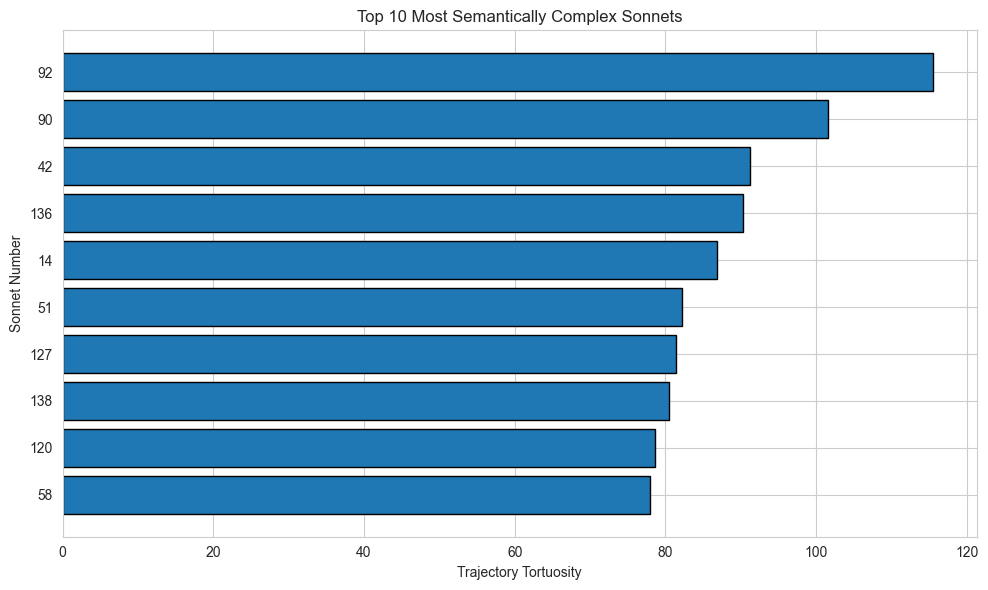

In [9]:
top10 = df.nlargest(10, 'overall_tortuosity')[['sonnet', 'overall_tortuosity', 'words_found']]
print("TOP 10 MOST SEMANTICALLY COMPLEX SONNETS")
print("="*50)
print(top10.to_string(index=False))

plt.figure(figsize=(10, 6))
plt.barh(top10['sonnet'].astype(str), top10['overall_tortuosity'], edgecolor='black')
plt.xlabel('Trajectory Tortuosity')
plt.ylabel('Sonnet Number')
plt.title('Top 10 Most Semantically Complex Sonnets')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Bottom 10 Least Complex Sonnets

BOTTOM 10 LEAST SEMANTICALLY COMPLEX SONNETS
 sonnet  overall_tortuosity  words_found
     66           35.243585           82
     63           41.407465           99
      6           43.155124           99
      4           43.394583           98
      7           43.428053           95
     62           43.587718          102
     77           43.981503          103
    153           44.729847          100
     95           45.152715          110
    128           45.869195          106


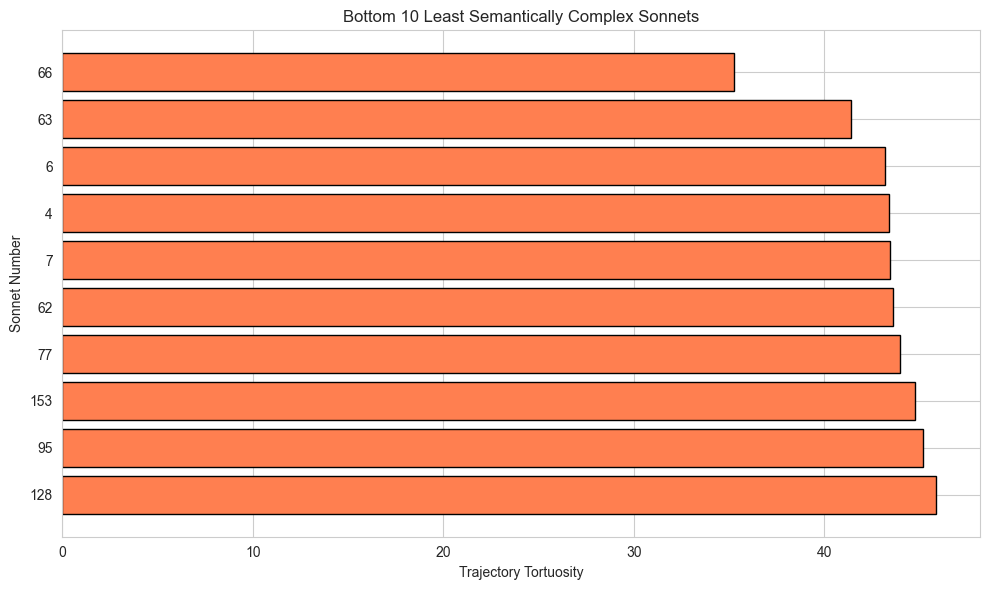

In [7]:
bottom10 = df.nsmallest(10, 'overall_tortuosity')[['sonnet', 'overall_tortuosity', 'words_found']]
print("BOTTOM 10 LEAST SEMANTICALLY COMPLEX SONNETS")
print("="*50)
print(bottom10.to_string(index=False))

plt.figure(figsize=(10, 6))
plt.barh(bottom10['sonnet'].astype(str), bottom10['overall_tortuosity'], edgecolor='black', color='coral')
plt.xlabel('Trajectory Tortuosity')
plt.ylabel('Sonnet Number')
plt.title('Bottom 10 Least Semantically Complex Sonnets')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Couplet Analysis

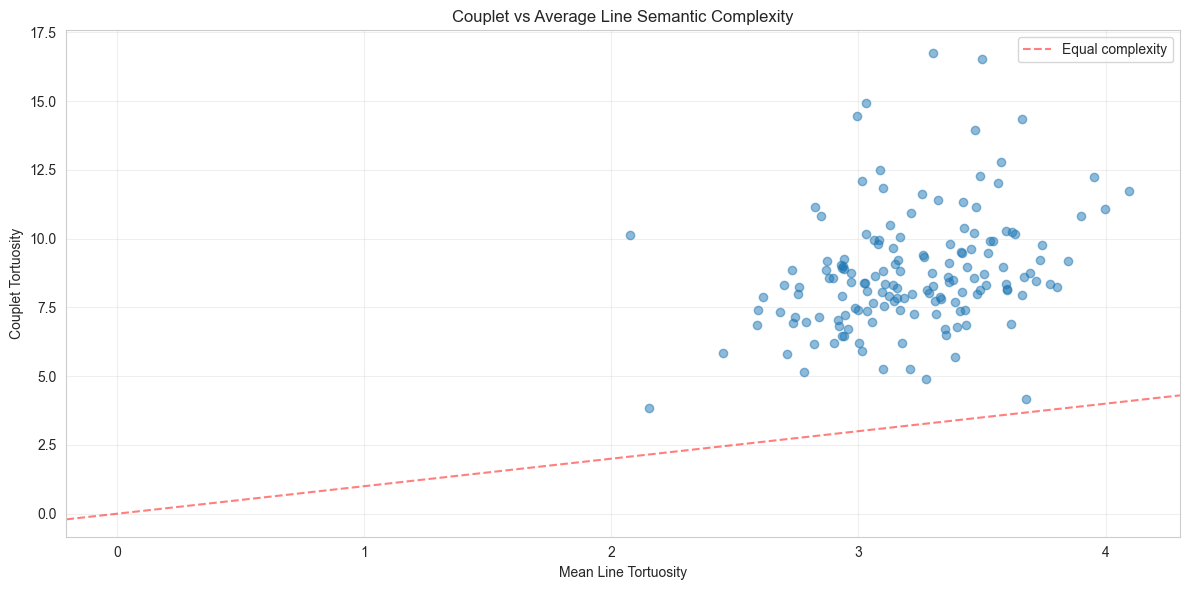


Couplets with higher tortuosity than average line: 154 sonnets (100.0%)


In [8]:
import plotly.graph_objects as go

# Create interactive scatter plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['mean_line_tortuosity'],
    y=df['couplet_tortuosity'],
    mode='markers',
    marker=dict(size=8, opacity=0.6, color=df['sonnet'], colorscale='Viridis', showscale=True),
    text=[f"Sonnet {row['sonnet']}<br>Mean Line: {row['mean_line_tortuosity']:.2f}<br>Couplet: {row['couplet_tortuosity']:.2f}" 
          for _, row in df.iterrows()],
    hovertemplate='%{text}<extra></extra>',
    name='Sonnets'
))

# Add diagonal line (y=x)
max_val = max(df['mean_line_tortuosity'].max(), df['couplet_tortuosity'].max())
fig.add_trace(go.Scatter(
    x=[0, max_val],
    y=[0, max_val],
    mode='lines',
    line=dict(color='red', dash='dash', width=2),
    name='Equal complexity',
    hoverinfo='skip'
))

fig.update_layout(
    title='Couplet vs Average Line Semantic Complexity<br><sub>Hover over points to see sonnet numbers</sub>',
    xaxis_title='Mean Line Tortuosity',
    yaxis_title='Couplet Tortuosity',
    hovermode='closest',
    width=900,
    height=600
)

fig.show()

# Also show top 10 sonnets with highest couplet complexity
print("\nTOP 10 SONNETS WITH HIGHEST COUPLET COMPLEXITY:")
print("="*60)
top_couplets = df.nlargest(10, 'couplet_tortuosity')[['sonnet', 'couplet_tortuosity', 'mean_line_tortuosity']]
print(top_couplets.to_string(index=False))

# Sonnets where couplet is much more complex than average line
df['couplet_vs_line_ratio'] = df['couplet_tortuosity'] / df['mean_line_tortuosity']
print("\n\nSONNETS WHERE COUPLET IS MUCH MORE COMPLEX THAN LINES:")
print("="*60)
high_ratio = df.nlargest(10, 'couplet_vs_line_ratio')[['sonnet', 'couplet_tortuosity', 'mean_line_tortuosity', 'couplet_vs_line_ratio']]
print(high_ratio.to_string(index=False))

print(f"\n\nCouplets with higher tortuosity than average line: {(df['couplet_tortuosity'] > df['mean_line_tortuosity']).sum()} sonnets ({(df['couplet_tortuosity'] > df['mean_line_tortuosity']).sum()/len(df)*100:.1f}%)")

## Poetry-BERT Comparison

Compare EEBO-BERT (historical semantics) vs Poetry-BERT (poetry-trained) on Shakespeare sonnets

In [ ]:
from transformers import BertModel, BertTokenizer
import torch
from tqdm import tqdm

# Paths to models
POETRY_BERT = "/Users/justin/Library/CloudStorage/GoogleDrive-stecj2700@gmail.com/My Drive/poetry_bert_trained"
EEBO_BERT = "/Users/justin/Library/CloudStorage/GoogleDrive-stecj2700@gmail.com/My Drive/AI and Poetry/Databases/Historical Embeddings/EEBO_1595-1700/eebo_bert_finetuned"

print("Loading Poetry-BERT...")
tokenizer_poetry = BertTokenizer.from_pretrained(POETRY_BERT)
model_poetry = BertModel.from_pretrained(POETRY_BERT)
model_poetry.eval()

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model_poetry.to(device)
print(f"✓ Poetry-BERT loaded on {device}")

In [ ]:
def get_embeddings(text, model, tokenizer, device):
    """Get contextualized embeddings for text."""
    tokens = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
    tokens = {k: v.to(device) for k, v in tokens.items()}
    
    with torch.no_grad():
        outputs = model(**tokens)
    
    # Return mean of last hidden layer (excluding [CLS] and [SEP])
    embeddings = outputs.last_hidden_state[0, 1:-1, :].mean(dim=0)
    return embeddings.cpu().numpy()


def calculate_tortuosity(embeddings):
    """Calculate trajectory tortuosity from sequence of embeddings."""
    if len(embeddings) < 2:
        return 0.0
    
    # Calculate cumulative angular deviation
    total_angle = 0.0
    for i in range(len(embeddings) - 2):
        v1 = embeddings[i+1] - embeddings[i]
        v2 = embeddings[i+2] - embeddings[i+1]
        
        # Normalize
        v1_norm = v1 / (np.linalg.norm(v1) + 1e-8)
        v2_norm = v2 / (np.linalg.norm(v2) + 1e-8)
        
        # Calculate angle
        cos_angle = np.clip(np.dot(v1_norm, v2_norm), -1.0, 1.0)
        angle = np.arccos(cos_angle)
        total_angle += angle
    
    # Euclidean distance
    euclidean = np.linalg.norm(embeddings[-1] - embeddings[0])
    
    if euclidean < 1e-8:
        return 0.0
    
    return total_angle / euclidean

print("✓ Helper functions defined")

In [ ]:
# Reanalyze sonnets with Poetry-BERT using the parsed sonnets file
import json

# Load sonnets from the parsed JSONL file
sonnets_path = '../corpus_samples/shakespeare_sonnets_parsed.jsonl'
sonnets = []
with open(sonnets_path, 'r') as f:
    for line in f:
        sonnets.append(json.loads(line))

print(f"Loaded {len(sonnets)} sonnets")

# Analyze with Poetry-BERT
results_poetry = []

for sonnet in tqdm(sonnets, desc="Analyzing with Poetry-BERT"):
    sonnet_num = sonnet['sonnet_number']
    lines = sonnet['lines']
    
    # Get embeddings for each line
    embeddings = []
    for line in lines:
        if line.strip():
            emb = get_embeddings(line, model_poetry, tokenizer_poetry, device)
            embeddings.append(emb)
    
    if len(embeddings) < 2:
        continue
    
    # Calculate tortuosity
    tort = calculate_tortuosity(embeddings)
    
    results_poetry.append({
        'sonnet': sonnet_num,
        'tortuosity_poetry': tort
    })

df_poetry = pd.DataFrame(results_poetry)
print(f"\n✓ Analyzed {len(df_poetry)} sonnets with Poetry-BERT")

### Comparison Statistics

In [ ]:
# Merge with EEBO-BERT results
df_comparison = df.merge(df_poetry, on='sonnet')

print("="*60)
print("EEBO-BERT vs POETRY-BERT COMPARISON")
print("="*60)

print(f"\nEEBO-BERT Tortuosity:")
print(f"  Mean: {df['overall_tortuosity'].mean():.2f}")
print(f"  SD:   {df['overall_tortuosity'].std():.2f}")

print(f"\nPoetry-BERT Tortuosity:")
print(f"  Mean: {df_comparison['tortuosity_poetry'].mean():.2f}")
print(f"  SD:   {df_comparison['tortuosity_poetry'].std():.2f}")

diff_mean = df_comparison['tortuosity_poetry'].mean() - df['overall_tortuosity'].mean()
diff_sd = df_comparison['tortuosity_poetry'].std() - df['overall_tortuosity'].std()

print(f"\nDifference:")
print(f"  Mean: {diff_mean:+.2f}")
print(f"  SD:   {diff_sd:+.2f}")

# Calculate correlation
corr = df_comparison['overall_tortuosity'].corr(df_comparison['tortuosity_poetry'])
print(f"\nCorrelation: {corr:.3f}")

### Visualization

In [ ]:
# Side-by-side comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distributions
axes[0, 0].hist(df['overall_tortuosity'], bins=30, alpha=0.5, label='EEBO-BERT', edgecolor='black')
axes[0, 0].hist(df_comparison['tortuosity_poetry'], bins=30, alpha=0.5, label='Poetry-BERT', edgecolor='black')
axes[0, 0].set_xlabel('Tortuosity')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Distribution Comparison')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Scatter plot
axes[0, 1].scatter(df_comparison['overall_tortuosity'], df_comparison['tortuosity_poetry'], alpha=0.5)
axes[0, 1].plot([0, 120], [0, 120], 'r--', alpha=0.5, label='y=x')
axes[0, 1].set_xlabel('EEBO-BERT Tortuosity')
axes[0, 1].set_ylabel('Poetry-BERT Tortuosity')
axes[0, 1].set_title(f'Correlation: {corr:.3f}')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Across sequence (EEBO-BERT)
axes[1, 0].plot(df['sonnet'], df['overall_tortuosity'], label='EEBO-BERT', alpha=0.7)
axes[1, 0].set_xlabel('Sonnet Number')
axes[1, 0].set_ylabel('Tortuosity')
axes[1, 0].set_title('EEBO-BERT Across Sequence')
axes[1, 0].grid(alpha=0.3)

# 4. Across sequence (Poetry-BERT)
axes[1, 1].plot(df_comparison['sonnet'], df_comparison['tortuosity_poetry'], label='Poetry-BERT', alpha=0.7, color='orange')
axes[1, 1].set_xlabel('Sonnet Number')
axes[1, 1].set_ylabel('Tortuosity')
axes[1, 1].set_title('Poetry-BERT Across Sequence')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Top 10 most different sonnets
df_comparison['abs_diff'] = abs(df_comparison['overall_tortuosity'] - df_comparison['tortuosity_poetry'])
top_diff = df_comparison.nlargest(10, 'abs_diff')[['sonnet', 'overall_tortuosity', 'tortuosity_poetry', 'abs_diff']]

print("TOP 10 SONNETS WITH BIGGEST DIFFERENCE")
print("="*60)
print(top_diff.to_string(index=False))

# Save comparison
df_comparison.to_csv('../results/eebo_vs_poetry_bert_comparison.csv', index=False)
print("\n✓ Saved comparison to results/eebo_vs_poetry_bert_comparison.csv")